# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("Online Retail.xlsx")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,11476.974671
std,218.081158,96.759853,6777.908326
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12352.000000
50%,3.000000,2.080000,14382.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
df["CustomerID"].fillna(0)


0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

In [19]:
df["CustomerID"].isnull().sum()

0

In [20]:
df.isnull().sum().sum()

0

In [21]:
df["Description"].isnull().sum()

0

In [22]:
df["Description"].fillna("UnKnown")

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [23]:
df["Description"].isnull().sum()


0

In [24]:

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
df["Month"] = df["InvoiceDate"].dt.month


In [26]:
abscols = ["Quantity", "UnitPrice"]


In [27]:
df[abscols] = df[abscols].abs()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,12


In [28]:
df.describe()


,Quantity,UnitPrice,CustomerID,Month
count,541909.000000,541909.000000,541909.000000,541909.000000
mean,11.340487,4.692766,11476.974671,7.553128
std,217.995482,96.755927,6777.908326,3.509055
min,1.000000,0.000000,0.000000,1.000000
25%,1.000000,1.250000,12352.000000,5.000000
50%,3.000000,2.080000,14382.000000,8.000000
75%,10.000000,4.130000,16255.000000,11.000000
max,80995.000000,38970.000000,18287.000000,12.000000


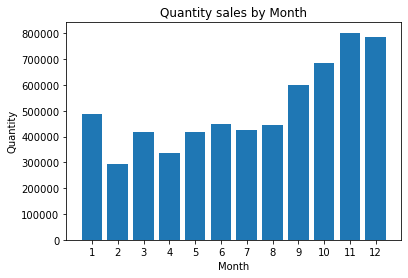

In [29]:
a = df.groupby("Month")[["Quantity"]].sum()
plt.bar(a.index, a["Quantity"])
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Quantity sales by Month")
plt.xticks(range(1,13))
plt.show()

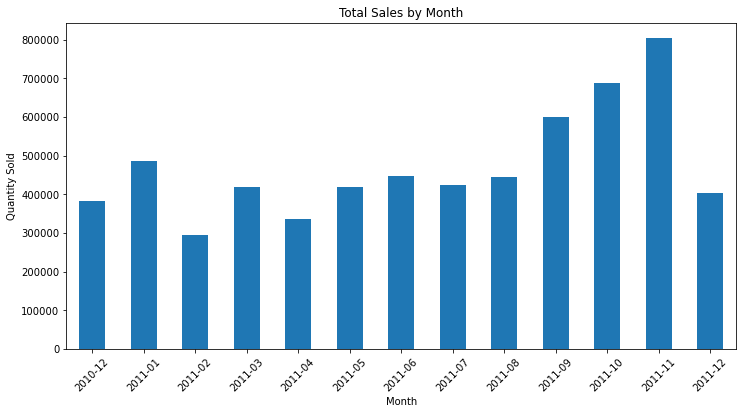

In [30]:
import matplotlib.pyplot as plt

# Convert InvoiceDate to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by month and sum the Quantity sold
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

# Plot the monthly sales trend
monthly_sales.plot(kind='bar', figsize=(12,6))
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [31]:
# Group by StockCode and Description, then sum the quantities
top_products = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)

# Display top 10 products
print(top_products.head(10))


StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           161990.0
23166      MEDIUM CERAMIC TOP STORAGE JAR        152527.0
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS      56247.0
85099B     JUMBO BAG RED RETROSPOT                49593.0
85123A     WHITE HANGING HEART T-LIGHT HOLDER     40181.0
22197      POPCORN HOLDER                         37188.0
21212      PACK OF 72 RETROSPOT CAKE CASES        36799.0
84879      ASSORTED COLOUR BIRD ORNAMENT          36541.0
23084      RABBIT NIGHT LIGHT                     30896.0
22492      MINI PAINT SET VINTAGE                 26829.0
Name: Quantity, dtype: float64


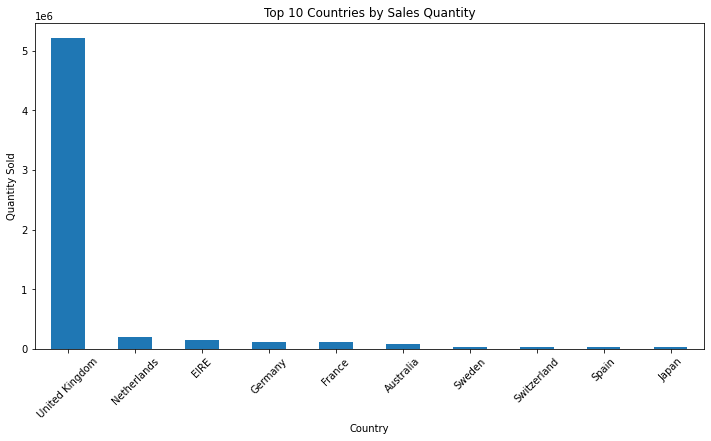

In [32]:
# Sales by Country
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Plot sales by country
country_sales.head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Countries by Sales Quantity")
plt.xlabel("Country")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()



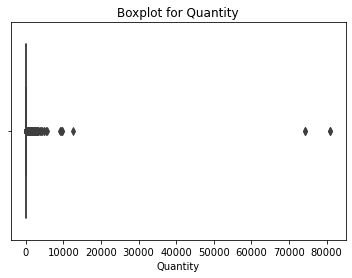

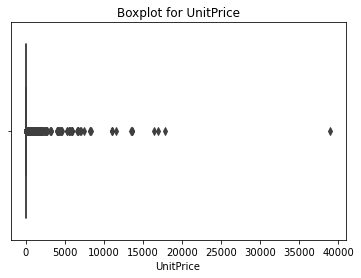

In [33]:
import seaborn as sns

# Boxplot for Quantity
sns.boxplot(x=df['Quantity'])
plt.title("Boxplot for Quantity")
plt.show()

# Boxplot for UnitPrice
sns.boxplot(x=df['UnitPrice'])
plt.title("Boxplot for UnitPrice")
plt.show()


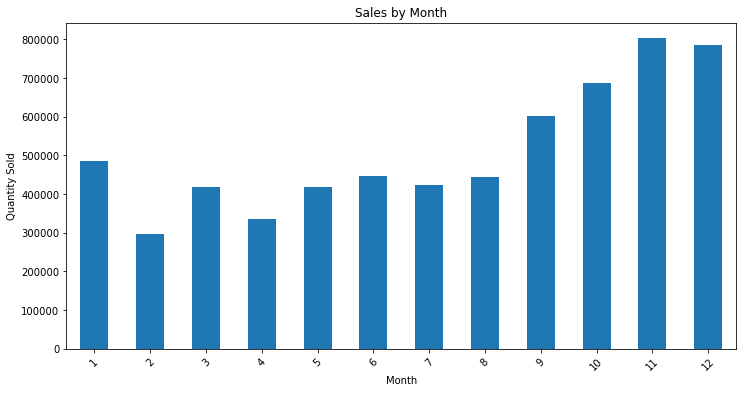

In [36]:
# Extract month and weekday
df['Month'] = df['InvoiceDate'].dt.month
df['Weekday'] = df['InvoiceDate'].dt.day_name()

# Group by month to find busiest months
monthly_sales = df.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='bar', figsize=(12,6))
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


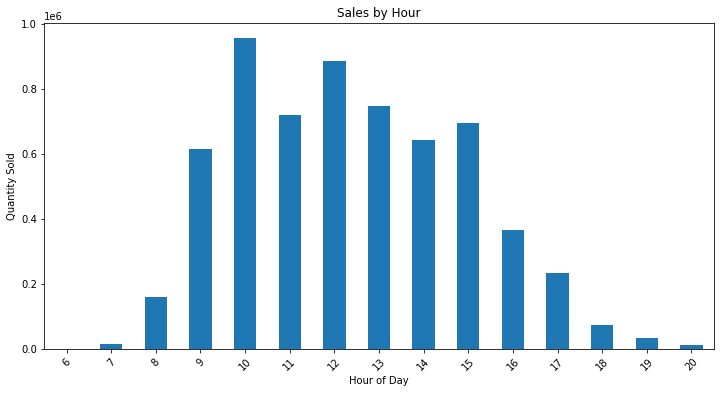

In [39]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['Quantity'].sum()

# Plot hourly sales
hourly_sales.plot(kind='bar', figsize=(12,6))
plt.title("Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

